# pandasで統計データの出力

## 内容

- 最大値、最小値、最頻値、算術平均、中央値、分散
- 件数
- 要約
- 相関係数
- 散布図行列
- groupbyでデータの集約
- pandasのデータフレームをnumpyのarrayを変換

In [1]:
import numpy as np
import pandas as pd

## 5章で保存したデータを読み出し

In [2]:
df = pd.read_pickle("data/df_201704health.pickle")

In [3]:
df

,歩数,摂取カロリー,歩数/カロリー,運動指数
date,,,,
2017-04-01,5439,2500.0,2.175600,Low
2017-04-02,2510,2300.0,1.091304,Low
2017-04-03,10238,1950.0,5.250256,Mid
2017-04-04,8209,1850.0,4.437297,Mid
2017-04-05,9434,1930.0,4.888083,Mid
2017-04-06,7593,1800.0,4.218333,Mid
2017-04-07,9320,1940.0,4.804124,Mid
2017-04-08,4873,2300.0,2.118696,Low
2017-04-09,12045,1950.0,6.176923,High


## 最大値、最小値、最頻値、算術平均、中央値、分散

In [4]:
df.loc[:, "摂取カロリー"].max()

2500.0

In [5]:
df.loc[:, "摂取カロリー"].min()

1800.0

In [6]:
df.loc[:, "摂取カロリー"].mode()

0    2300.0
dtype: float32

In [7]:
df.loc[:, "摂取カロリー"].mean()

2026.6666

In [8]:
df.loc[:, "摂取カロリー"].median()

1945.0

In [9]:
df.loc[:, "摂取カロリー"].std()

205.54944

## 件数

In [10]:
df[df.loc[:, "摂取カロリー"]==2300].count()

歩数         8
摂取カロリー     8
歩数/カロリー    8
運動指数       8
dtype: int64

## 要約

In [11]:
df.describe()

,歩数,摂取カロリー,歩数/カロリー
count,30.000000,30.000000,30.000000
mean,7766.366667,2026.666626,3.929658
std,2689.269308,205.549438,1.563674
min,2510.000000,1800.000000,1.091304
25%,6661.500000,1870.000000,2.921522
50%,7561.000000,1945.000000,4.030762
75%,8408.500000,2300.000000,4.421622
max,15328.000000,2500.000000,8.515556


## 相関係数

In [12]:
df.corr()

,歩数,摂取カロリー,歩数/カロリー
歩数,1.000000,-0.498703,0.982828
摂取カロリー,-0.498703,1.000000,-0.636438
歩数/カロリー,0.982828,-0.636438,1.000000


## 散布図行列

In [13]:
%matplotlib inline

In [14]:
from pandas.plotting import scatter_matrix

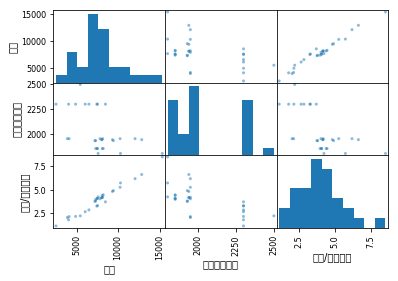

In [15]:
_ = scatter_matrix(df)

## groupbyでデータの集約

In [16]:
df.groupby(df.loc[:, "運動指数"]).mean()

,歩数,摂取カロリー,歩数/カロリー
運動指数,,,
High,13407.333333,1896.666626,7.105225
Low,4668.500000,2237.500000,2.084007
Mid,8180.052632,1958.421021,4.205369


In [17]:
df.groupby(df.loc[:, "運動指数"]).describe().T

運動指数                   High          Low           Mid
摂取カロリー  count      3.000000     8.000000     19.000000
        mean    1896.666626  2237.500000   1958.421021
        std       83.864967   190.394333    160.321320
        min     1800.000000  1950.000000   1800.000000
        25%     1870.000000  2212.500000   1850.000000
        50%     1940.000000  2300.000000   1930.000000
        75%     1945.000000  2300.000000   1950.000000
        max     1950.000000  2500.000000   2300.000000
歩数      count      3.000000     8.000000     19.000000
        mean   13407.333333  4668.500000   8180.052632
        std     1711.234739  1297.682109    960.355517
        min    12045.000000  2510.000000   7203.000000
        25%    12447.000000  3994.250000   7492.500000
        50%    12849.000000  4483.000000   8031.000000
        75%    14088.500000  5587.500000   8342.000000
        max    15328.000000  6481.000000  10287.000000
歩数/カロリー count      3.000000     8.000000     19.000000
        mean       7.105225     2.084007      4.205369
        std        1.241598     0.526806      0.620617
        min        6.176923     1.091304      3.232609
        25%        6.400059     1.934089      3.861855
        50%        6.623196     2.108835      4.139691
        75%        7.569376     2.287461      4.405946
        max        8.515556     2.817826      5.715000

## pandasのデータフレームをnumpyのarrayを変換

In [18]:
df.loc[:, ["歩数", "摂取カロリー"]]

,歩数,摂取カロリー
date,,
2017-04-01,5439,2500.0
2017-04-02,2510,2300.0
2017-04-03,10238,1950.0
2017-04-04,8209,1850.0
2017-04-05,9434,1930.0
2017-04-06,7593,1800.0
2017-04-07,9320,1940.0
2017-04-08,4873,2300.0
2017-04-09,12045,1950.0


In [19]:
df.loc[:, ["歩数", "摂取カロリー"]].as_matrix()

array([[  5439.,   2500.],
       [  2510.,   2300.],
       [ 10238.,   1950.],
       [  8209.,   1850.],
       [  9434.,   1930.],
       [  7593.,   1800.],
       [  9320.,   1940.],
       [  4873.,   2300.],
       [ 12045.,   1950.],
       [  7493.,   1850.],
       [  7289.,   1930.],
       [  6481.,   2300.],
       [ 10287.,   1800.],
       [  8043.,   1940.],
       [  7435.,   2300.],
       [  7529.,   2300.],
       [  8031.,   1940.],
       [  8475.,   2300.],
       [  8132.,   1950.],
       [ 15328.,   1800.],
       [ 12849.,   1940.],
       [  4029.,   2300.],
       [  3890.,   1950.],
       [  8093.,   1850.],
       [  7823.,   1950.],
       [  7492.,   1850.],
       [  7203.,   1930.],
       [  7302.,   1850.],
       [  6033.,   2300.],
       [  4093.,   1950.]])